In [1]:
import spacy

from oversea import read
from oversea import transformers

data = transformers.expeditions.transform(
    read.read_expeditions()
)

In [2]:
from oversea.nlp.load_nlp import load_nlp

nlp = load_nlp()

In [3]:
docs = transformers.expeditions.with_spacy(nlp, data)

In [4]:
lengths = [len(doc) for doc in docs]
lengths.sort()

In [5]:
description = transformers.describe_sequence.describe(lengths)

In [8]:
from oversea import visuals

visuals.lists.histogram(lengths)

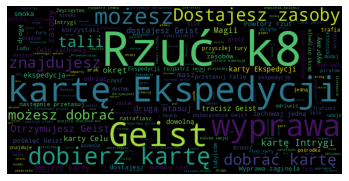

In [31]:
import wordcloud
import functools
from matplotlib import pyplot

all_tokens = (functools.reduce(lambda acc, value: acc + list(value), docs, []))
all_words = " ".join([token.orth_ for token in all_tokens])
my_wordcloud = wordcloud.WordCloud(
    width=1000, height=500, stopwords=nlp.Defaults.stop_words,
).generate(all_words)

pyplot.imshow(my_wordcloud)
pyplot.axis("off")
pyplot.show()

my_wordcloud.to_file("wordcloud.png")